In [0]:
#%% import

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#%% 1. load data

train = pd.read_csv('/content/train 2.csv')
test = pd.read_csv('/content/test 2.csv')


train_df=train
test_df=test

print("train")
print(train.shape)

print("test")
print(test.shape)

train
(856387, 28)
test
(1921357, 13)


Download The data from this link https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/data

In [3]:
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [4]:
#Finding the columns whether they are categorical or numerical
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns

print("Numerical Columns",num_cols)
cat_cols=list(set(cols) - set(num_cols))
print("**"*20) #separate the columns from the rest of the data
print("Categorical Columns:",cat_cols)

Numerical Columns Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80'],
      dtype='object')
****************************************
Categorical Columns: ['City', 'ExitHeading', 'Path', 'EntryStreetName', 'ExitStreetName', 'EntryHeading']


In [0]:
#let's drop the missing data in the dataset
train=train_df #make a copy of the data before droping the empty columns
train_df=train_df.dropna()

In [6]:
train_df.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
#we separate the data in terms of cities through slice masks
Atlanda=train_df[train_df['City']=='Atlanta']
Boston=train_df[train_df['City']=='Boston']
Chicago=train_df[train_df['City']=='Chicago']
Philadelphia=train_df[train_df['City']=='Philadelphia']

In [0]:
#total waiting time based on the unique
Atlanda['TotalTimeWaited']=Atlanda['TotalTimeStopped_p20']+Atlanda['TotalTimeStopped_p40']+Atlanda['TotalTimeStopped_p50']+Atlanda['TotalTimeStopped_p60']+Atlanda['TotalTimeStopped_p80']
Boston['TotalTimeWaited']=Boston['TotalTimeStopped_p20']+Boston['TotalTimeStopped_p40']+Boston['TotalTimeStopped_p50']+Boston['TotalTimeStopped_p60']+Boston['TotalTimeStopped_p80']
Chicago['TotalTimeWaited']=Chicago['TotalTimeStopped_p20']+Chicago['TotalTimeStopped_p40']+Chicago['TotalTimeStopped_p50']+Chicago['TotalTimeStopped_p60']+Chicago['TotalTimeStopped_p80']
Philadelphia['TotalTimeWaited']=Philadelphia['TotalTimeStopped_p20']+Philadelphia['TotalTimeStopped_p40']+Philadelphia['TotalTimeStopped_p50']+Philadelphia['TotalTimeStopped_p60']+Philadelphia['TotalTimeStopped_p80']

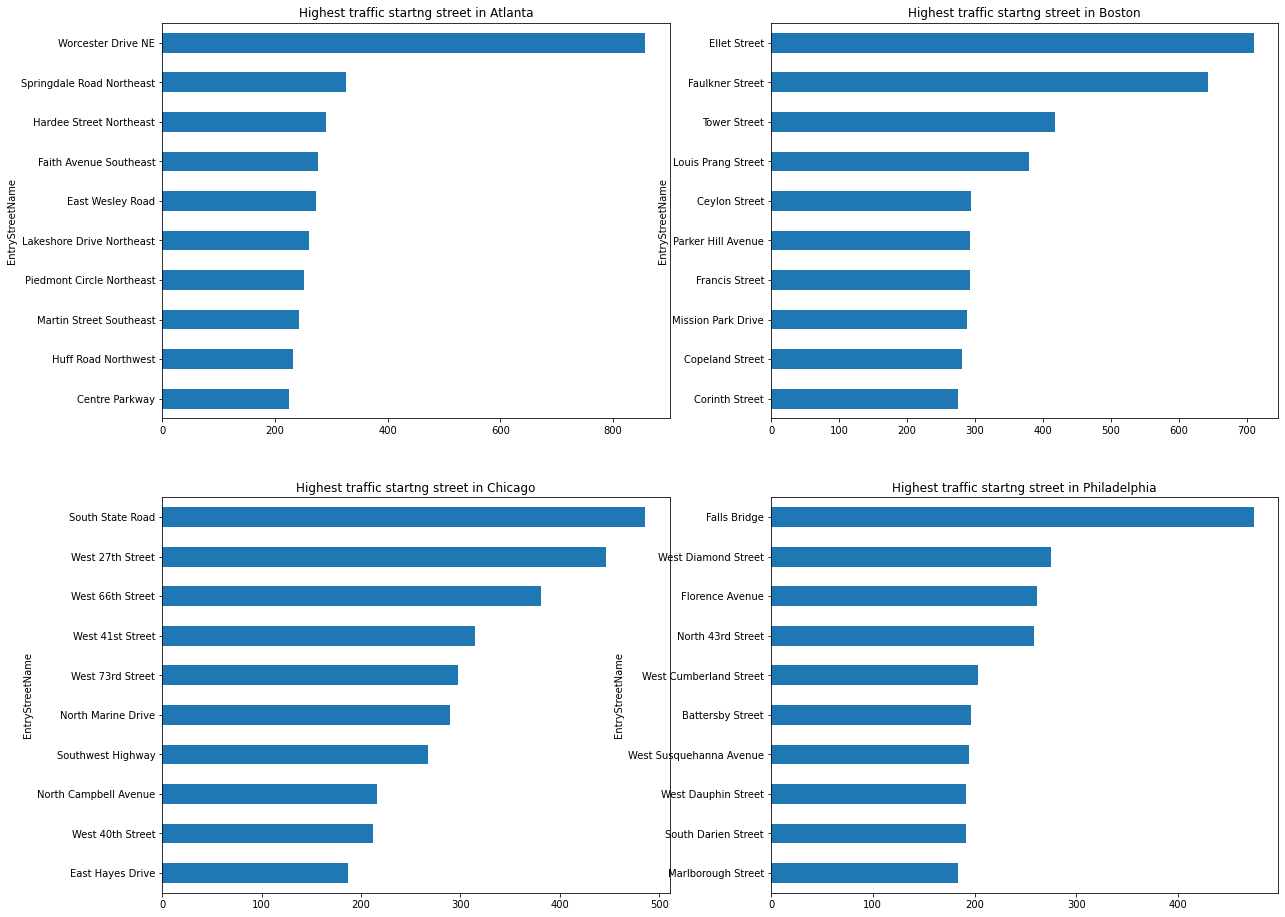

<Figure size 1440x1152 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))

temp_1=Atlanda.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Highest traffic startng street in Atlanta')

temp_2=Boston.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Highest traffic startng street in Boston')

temp_3=Chicago.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Highest traffic startng street in Chicago')

temp_4=Philadelphia.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Highest traffic startng street in Philadelphia')


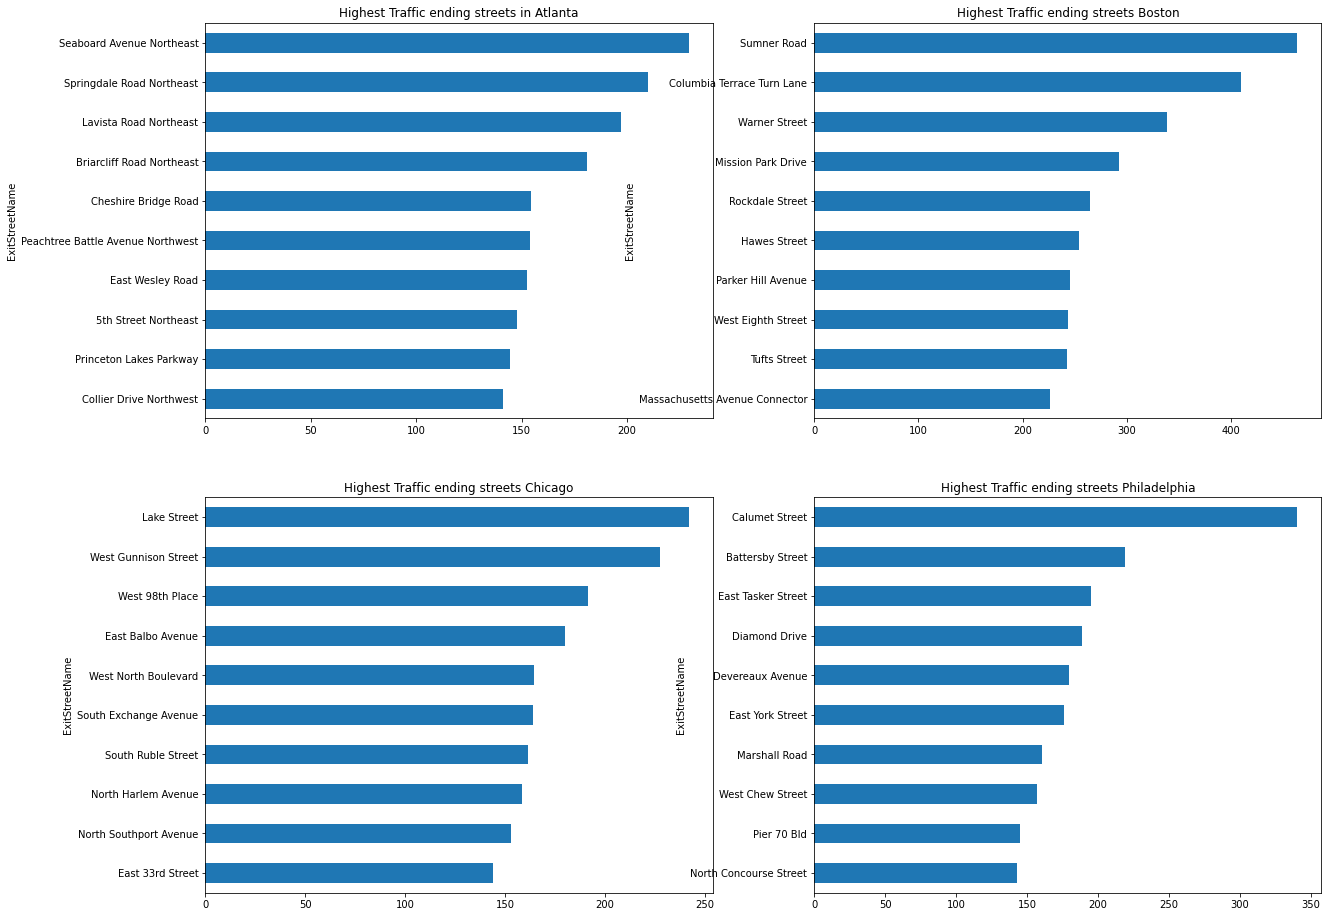

<Figure size 1440x1152 with 0 Axes>

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))

temp_1=Atlanda.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Highest Traffic ending streets in Atlanta')

temp_2=Boston.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Highest Traffic ending streets Boston')

temp_3=Chicago.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Highest Traffic ending streets Chicago')

temp_4=Philadelphia.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Highest Traffic ending streets Philadelphia')


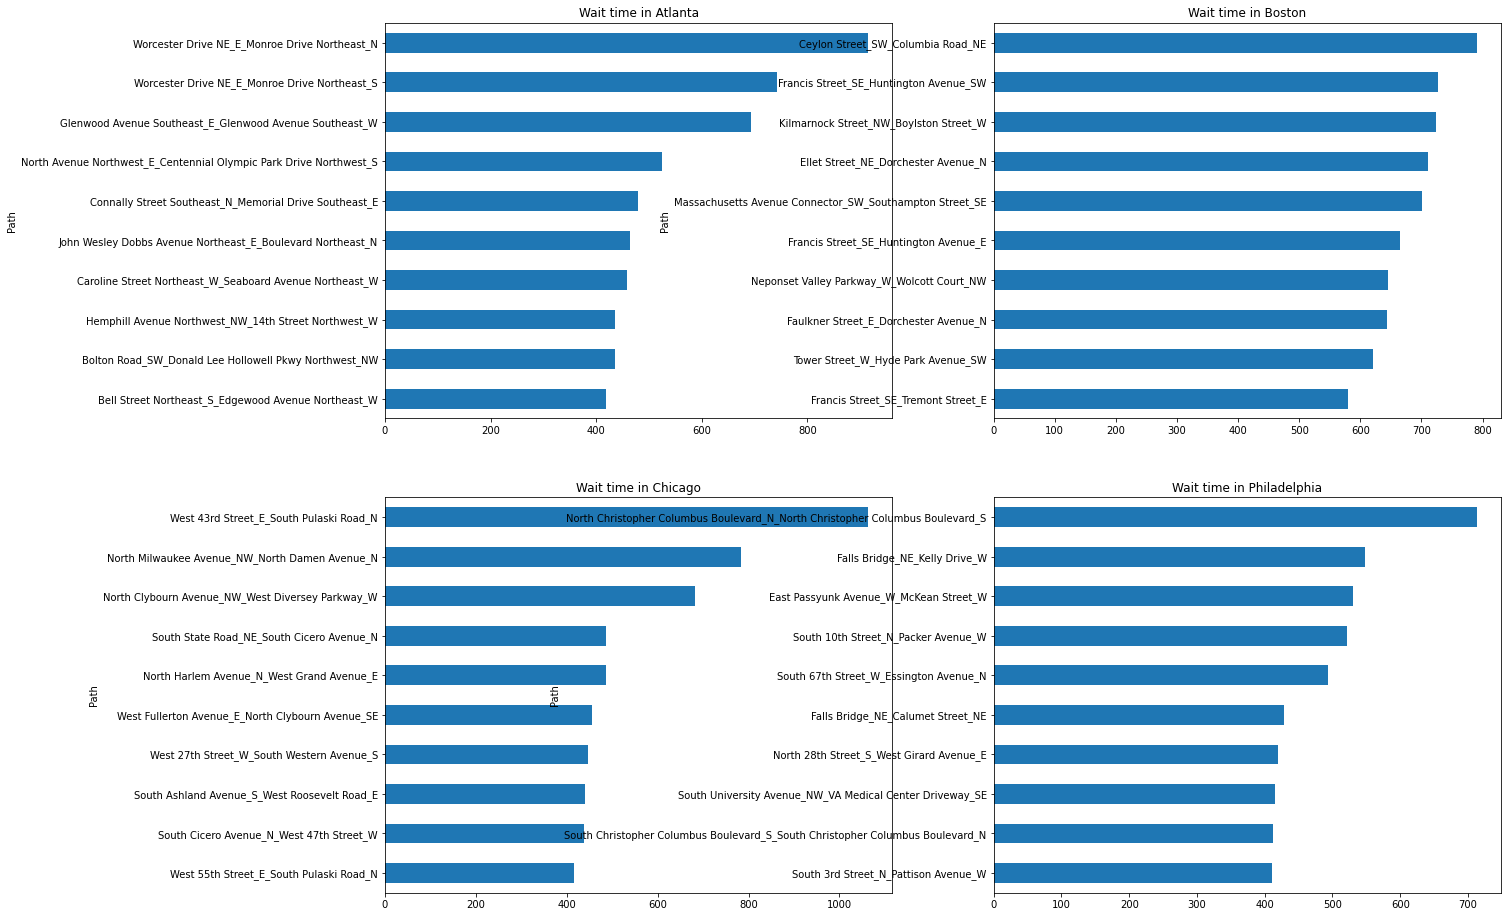

<Figure size 1440x1152 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))

temp_1=Atlanda.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Wait time in Atlanta')

temp_2=Boston.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Wait time in Boston')

temp_3=Chicago.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Wait time in Chicago')

temp_4=Philadelphia.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Wait time in Philadelphia')

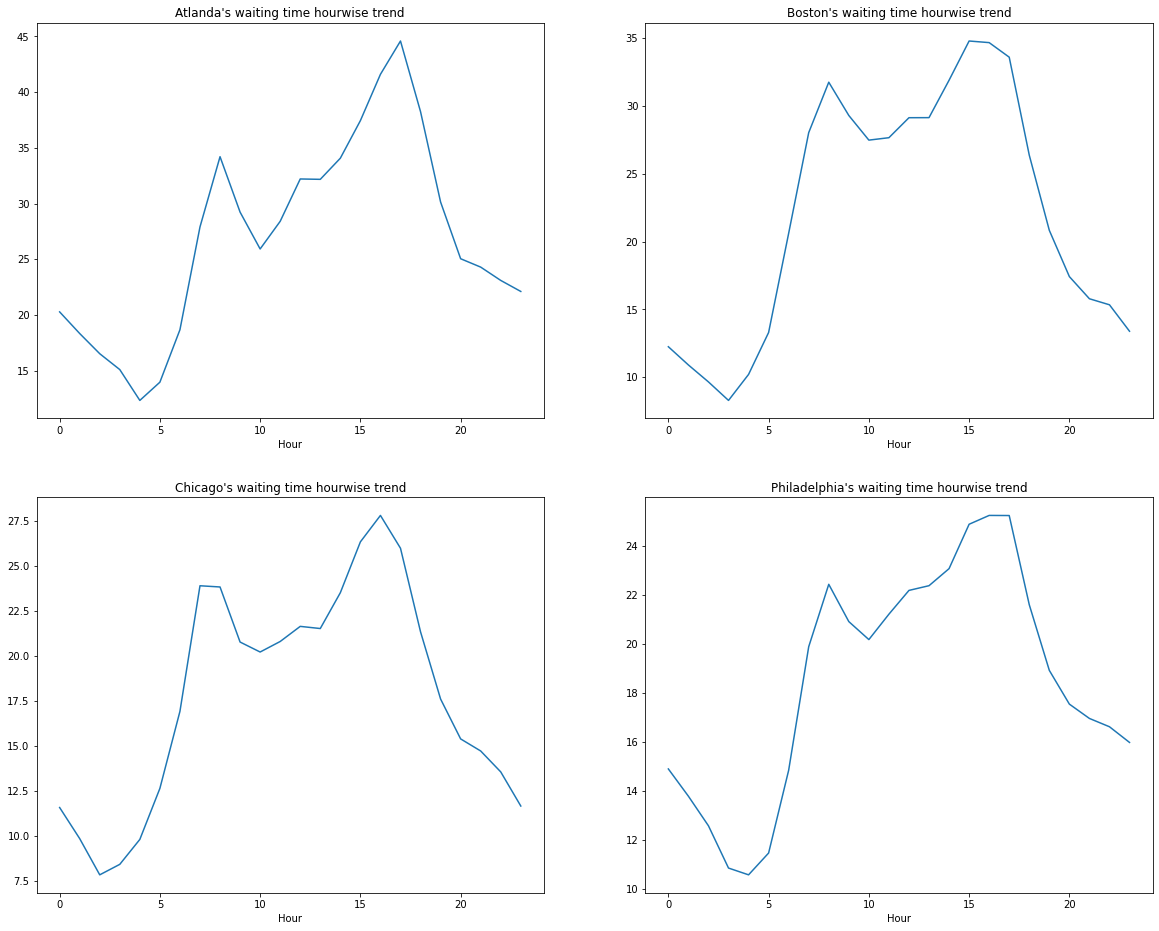

In [13]:
fig , axes = plt.subplots(nrows=2, ncols=2)


A_hr=Atlanda.groupby('Hour')['TotalTimeStopped_p80'].mean()
A_hr.plot(ax=axes[0,0],title="Atlanda's waiting time hourwise trend",figsize=(20,16))


B_hr=Boston.groupby('Hour')['TotalTimeStopped_p80'].mean()
B_hr.plot(ax=axes[0,1],title="Boston's waiting time hourwise trend",figsize=(20,16))


C_hr=Chicago.groupby('Hour')['TotalTimeStopped_p80'].mean()
C_hr.plot(ax=axes[1,0],title="Chicago's waiting time hourwise trend",figsize=(20,16))


P_hr=Philadelphia.groupby('Hour')['TotalTimeStopped_p80'].mean()
P_hr.plot(ax=axes[1,1],title="Philadelphia's waiting time hourwise trend",figsize=(20,16))


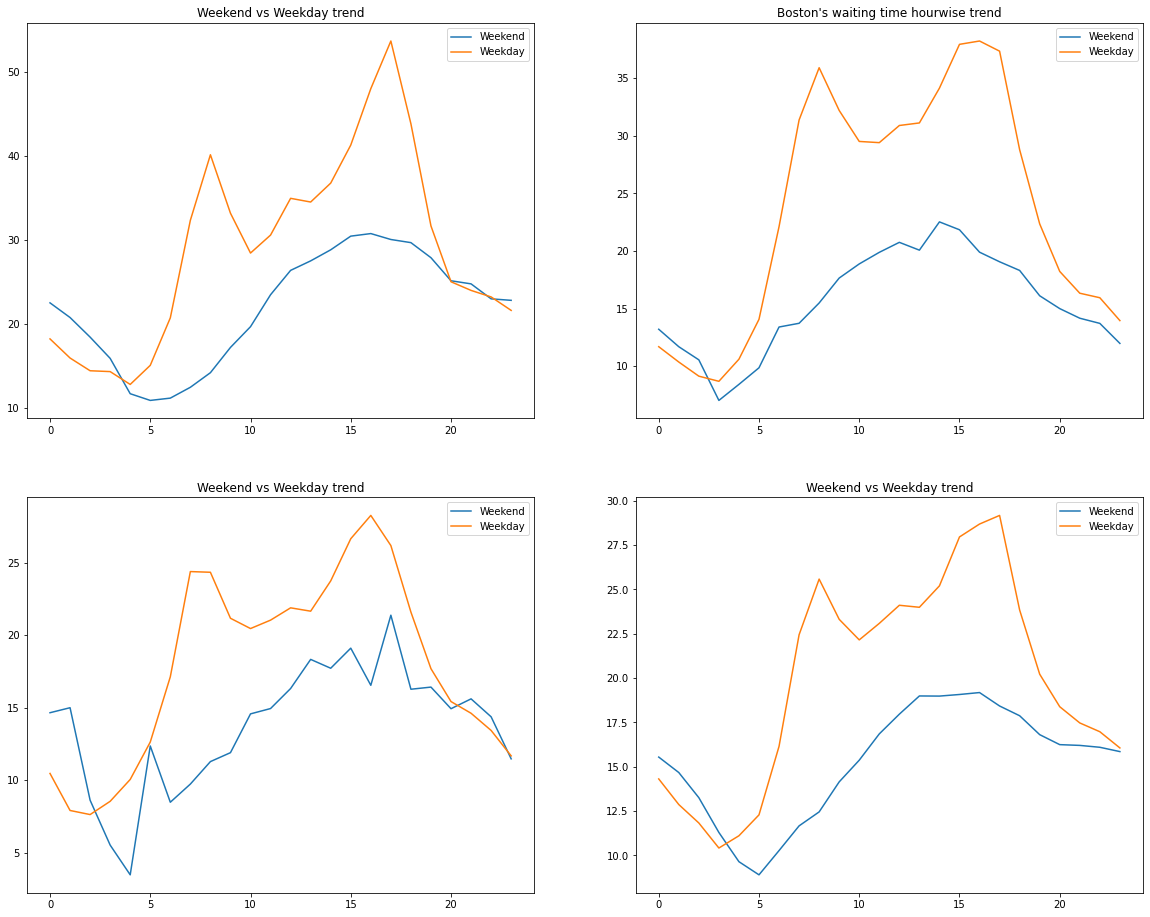

In [14]:
fig , axes = plt.subplots(nrows=2, ncols=2)

A_hr=pd.DataFrame(index=Atlanda.Hour.unique())
A_hr['Weekend']=Atlanda[Atlanda['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
A_hr['Weekday']=Atlanda[Atlanda['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
A_hr=A_hr.sort_index()
A_hr.plot(ax=axes[0,0],title="Weekend vs Weekday trend",figsize=(20,16))


B_hr=pd.DataFrame(index=Boston.Hour.unique())
B_hr['Weekend']=Boston[Boston['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
B_hr['Weekday']=Boston[Boston['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
B_hr=B_hr.sort_index()
B_hr.plot(ax=axes[0,1],title="Boston's waiting time hourwise trend",figsize=(20,16))


C_hr=pd.DataFrame(index=Chicago.Hour.unique())
C_hr['Weekend']=Chicago[Chicago['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
C_hr['Weekday']=Chicago[Chicago['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
C_hr=C_hr.sort_index()
C_hr.plot(ax=axes[1,0],title="Weekend vs Weekday trend",figsize=(20,16))


P_hr=pd.DataFrame(index=Atlanda.Hour.unique())
P_hr['Weekend']=Philadelphia[Philadelphia['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
P_hr['Weekday']=Philadelphia[Philadelphia['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
P_hr=P_hr.sort_index()
P_hr.plot(ax=axes[1,1],title="Weekend vs Weekday trend",figsize=(20,16))

In [0]:
#%% 2. functions

road_encoding = {
                "Street":0,
                "St":0,
                "Avenue":1,
                "Ave":1,
                "Boulevard":2,
                "Blvd":2,
                "Road":3,
                "Drive":4,
                "Lane":5,
                "Tunnel":6,
                "Highway":7,
                "Way":8,
                "Parkway":9,
                "Parking":10,
                "Oval":11,
                "Square":12,
                "Place":13,
                "Bridge":14
                }


def getEntryExitType(x):
    if pd.isna(x):
        return 0
    else:
        for en in road_encoding.keys():
            if en in x:
                return road_encoding[en]
        
  

In [16]:
#%% 3. preprocess data

# null and unique values
print("train")
print("null")
print(train.isnull().sum())

print("=================================")
print("unique")
print(train.nunique())

print("=================================")
print("test")
print("null")
print(test.isnull().sum())

print("=================================")
print("unique")
print(test.nunique())




train
null
RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64
unique
RowId                      856387
IntersectionId               2559
Latit

In [17]:
#%% 3.a. fill na in EntryStreetName and ExitStreetName

train.dropna(axis='rows', inplace=True)
test.dropna(axis='rows', inplace=True)

print("train")
print(train.shape)

print("test")
print(test.shape)

train
(842452, 28)
test
(1888134, 13)


In [0]:
#%% 3.b. extract feature EntryType and ExitType ; SameEntryExit
for df in [train, test]:
        df['EntryType'] = df['EntryStreetName'].apply(lambda x: getEntryExitType(x))
        df['ExitType'] = df['ExitStreetName'].apply(lambda x: getEntryExitType(x))

In [0]:
for df in [train, test]:
        df['SameEntryExit'] = (df['EntryStreetName'] == df['ExitStreetName']).astype(int)

In [0]:
#train.to_csv("train_preprocessed.csv", index = False, header=True)

In [0]:
#%% 3.c. encode categorical features

#EntryHeading and ExitHeading
directions = {'N': 0, 'NE': 1/4, 'E': 1/2, 'SE': 3/4, 'S': 1, 'SW': 5/4, 'W': 3/2, 'NW': 7/4}

for df in [train, test]:
    df['EntryHeading'] = df['EntryHeading'].map(directions)
    df['ExitHeading'] = df['ExitHeading'].map(directions)

#City
from sklearn.preprocessing import LabelEncoder
for df in [train, test]:
    df['City'] = LabelEncoder().fit_transform(df['City'])
    



In [22]:
#%% 4. model LGBM

from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = train[['Latitude', 'Longitude', 'EntryHeading', 'ExitHeading', 'SameEntryExit', 'EntryType', 'ExitType', 'Hour', 'Weekend', 'Month', 'City']]
Y = train[['DistanceToFirstStop_p80']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#param
param = {'max_depth': 20,
         'learning_rate': 0.1,
         'objective': 'regression',
         'boosting_type': 'gbdt',
         'verbose': 1,
         'metric': 'rmse',
         'seed': 42,
         'n_jobs': 12}

dataset = lgb.Dataset(X_train, label = Y_train, categorical_feature=['City', 'Weekend', 'SameEntryExit'])

#train
num_round = 1000
regModel = lgb.train(param, dataset, num_round)
    
#predict
Y_pred = regModel.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(rmse)
    

94.19047228162525


In [23]:
#%% 5. model LR

from sklearn.linear_model import LinearRegression

train.dropna(axis='rows', inplace=True)

X = train[['Latitude', 'Longitude', 'EntryHeading', 'ExitHeading', 'SameEntryExit', 'EntryType', 'ExitType', 'Hour', 'Weekend', 'Month', 'City']]
Y = train[['DistanceToFirstStop_p80']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred= regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(rmse)


159.5184473794811


In [0]:
X = train[['Latitude', 'Longitude', 'EntryHeading', 'ExitHeading', 'SameEntryExit', 'EntryType', 'ExitType', 'Hour', 'Weekend', 'Month', 'City']]
#Y = train[['DistanceToFirstStop_p80']]


y1 = train["TotalTimeStopped_p20"]
y2 = train["TotalTimeStopped_p50"]
y3 = train["TotalTimeStopped_p80"]
y4 = train["DistanceToFirstStop_p20"]
y5 = train["DistanceToFirstStop_p50"]
y6 = train["DistanceToFirstStop_p80"]

y=[y1,y2,y3,y4,y5,y6]


trainX=[]
trainY=[]
testX=[]
testY=[]


for i in y:
  X_train, X_test, y_train, y_test = train_test_split(X,i, test_size=0.33, random_state=0)
  trainX.append(X_train)
  trainY.append(y_train)
  testX.append(X_test)
  testY.append(y_test)






In [25]:
from xgboost import XGBRegressor
# xgb_1 = XGBRegressor()
xgb_1_predict=[]

print(type(testY[0]))

for i in range(0,6):
  xgb_1 = XGBRegressor()
  xgb_1.fit(trainX[0], trainY[i])
  xgb_1_predict.append(xgb_1.predict(testX[i]))
  

<class 'pandas.core.series.Series'>
[00:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
from sklearn.metrics import mean_squared_error
import math
xgboostres=[]
for i,c in enumerate(xgb_1_predict):
  xgboostres.append(math.sqrt(mean_squared_error(testY[i], c)))

xgboostres

[6.765073641941503,
 14.499133149941278,
 25.628161668372186,
 28.755565986889295,
 71.51796626126142,
 150.25139285405547]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
#X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=42)
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,
           'loss': 'ls'}

GBR=[]

for i in range(0,6):
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(trainX[0], trainY[i])
  GBR.append(clf.predict(testX[i]))

In [28]:
GBRresult=[]

for i,c in enumerate(GBR):
  GBRresult.append(math.sqrt(mean_squared_error(testY[i], c)))

GBRresult

[6.765458818367901,
 14.525717676742211,
 25.712579251059896,
 28.87035136230173,
 71.67116638922423,
 150.17914006035417]

In [0]:
from sklearn.ensemble import RandomForestRegressor
RFR=[]

for i in range(0,6):  
  rf = RandomForestRegressor(n_estimators =50 , random_state = 42)
  rf.fit(trainX[0], trainY[i])
  RFR.append( rf.predict(testX[i]))

In [30]:
RFResut=[]
for i,c in enumerate(RFR):
  RFResut.append(math.sqrt(mean_squared_error(testY[i], c)))

RFResut

[5.747022176803589,
 10.020800625983345,
 16.951620262185433,
 26.725114524662946,
 52.56472510580925,
 88.93317279539]

In [0]:
#param
param = {'max_depth': 20,
         'learning_rate': 0.1,
         'objective': 'regression',
         'boosting_type': 'gbdt',
         'verbose': 1,
         'metric': 'rmse',
         'seed': 42,
         'n_jobs': 12}
num_round = 1000


lgbm=[]




for i in range(0,6):
  dataset = lgb.Dataset(trainX[0], label = trainY[i], categorical_feature=['City', 'Weekend', 'SameEntryExit'])
  regModel = lgb.train(param, dataset, num_round)
  lgbm.append(regModel.predict(testX[i]))

  

In [32]:
lgbmResult=[]
for i,c in enumerate(lgbm):
  lgbmResult.append(math.sqrt(mean_squared_error(testY[i], c)))

lgbmResult

[5.7787092426687465,
 11.183755874322818,
 19.674182983377875,
 25.54489610873998,
 53.80847952940762,
 95.38217801720361]

Text(0.5, 1.0, 'XGradient Boosting Regressor')

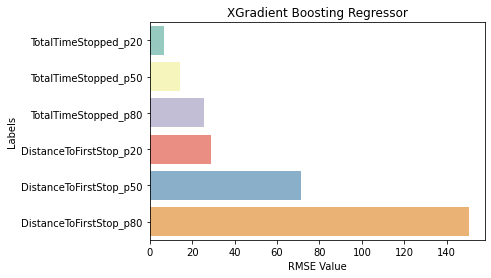

In [33]:
import seaborn as sns

objects = ["TotalTimeStopped_p20", "TotalTimeStopped_p50", "TotalTimeStopped_p80","DistanceToFirstStop_p20","DistanceToFirstStop_p50","DistanceToFirstStop_p80"]
ax = sns.barplot(x=xgboostres, y=objects,palette="Set3")
ax.set_xlabel('RMSE Value')
ax.set_ylabel('Labels')
ax.set_title('XGradient Boosting Regressor')

Text(0.5, 1.0, 'Random Forrest Regressor')

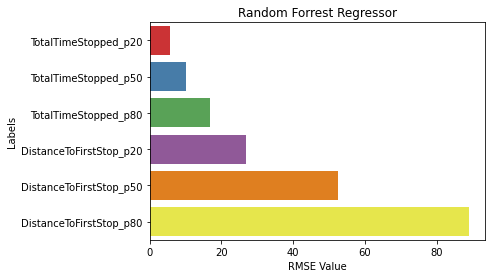

In [34]:
ax = sns.barplot(x=RFResut, y=objects,palette="Set1")
ax.set_xlabel('RMSE Value')
ax.set_ylabel('Labels')
ax.set_title('Random Forrest Regressor')

Text(0.5, 1.0, 'LGBM')

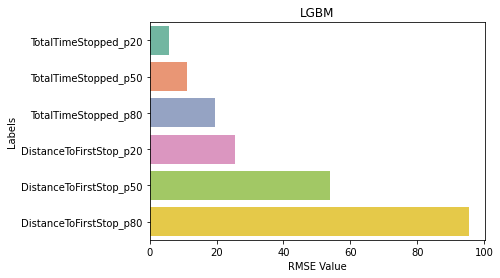

In [35]:
ax = sns.barplot(x=lgbmResult, y=objects,palette="Set2")
ax.set_xlabel('RMSE Value')
ax.set_ylabel('Labels')
ax.set_title('LGBM')